# Analysis of Parent Education Level and Student Academic Performance

<p style="text-align: center;">
<img src="../../../images/edulevel.jfif" alt="Demographics and Background" style="width: 800px; height: 500px;">
</p>

This analysis explores the relationship between **Parent Education Level** and students' academic performance. Understanding this correlation is crucial as parental education often influences the support and resources provided at home, which can significantly impact students' educational outcomes.

1. **Hypothesis**: Higher parental education levels are expected to lead to increased academic support for students, fostering better academic performance.
  
2. **Research Questions**:
   - How do different levels of parent education influence students' academic performance?
   - Do higher parental education levels result in greater involvement in students' education and homework assistance?

This analysis aims to provide insights into how parental educational backgrounds contribute to student success and identify areas for potential intervention to support students from families with lower education levels.


In [5]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


In [22]:
query = "SELECT * FROM student_performance;"
data_frame = pd.read_sql(query, con=engine)
data_frame.shape

(100, 47)

## How do different levels of parent education influence students' academic performance?

In [26]:
contingency_table = pd.crosstab(data_frame['Parent Education Level'], data_frame['Last Exam Performance'])

# Displaying the contingency table
print(contingency_table)

Last Exam Performance    40% - 59%  60% - 69%  70% - 100%  Below 40%
Parent Education Level                                              
Higher Education                 3         13          19          3
No formal education              0          0           1          1
Post-graduate education          0         18          14          0
Primary school                   0          2           1          0
Secondary school                 9          6           9          1


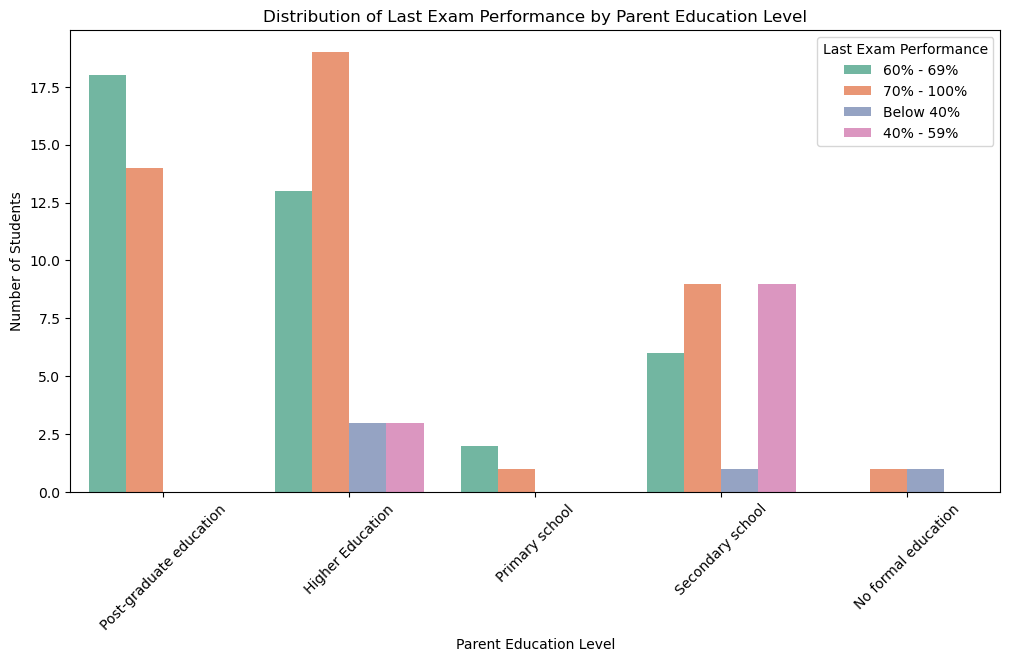

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_frame, x='Parent Education Level', hue='Last Exam Performance', palette='Set2')
plt.title('Distribution of Last Exam Performance by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Last Exam Performance')

image_path = '../../../docs/distparentedu.png'  
plt.savefig(image_path)

plt.show()

### Contingency Table Output
The table below shows the number of students in each category of **Last Exam Performance** based on their **Parent Education Level**:

| Parent Education Level       | Below 40% | 40% - 59% | 60% - 69% | 70% - 100% |
|------------------------------|-----------|-----------|-----------|------------|
| Higher Education              | 3         | 3         | 13        | 19         |
| No Formal Education           | 1         | 0         | 0         | 1          |
| Post-Graduate Education       | 0         | 0         | 18        | 14         |
| Primary School                | 0         | 0         | 2         | 1          |
| Secondary School              | 1         | 9         | 6         | 9          |

### Insights
1. **Higher Education**:
   - Students with parents who have a higher education level perform significantly better, with the highest count (19) in the **70% - 100%** category.
   - There are only a few students in the **Below 40%** and **40% - 59%** categories (3 each), indicating better overall performance.

2. **No Formal Education**:
   - This group has very few students, with only 1 student in both the **Below 40%** and **70% - 100%** categories.
   - This suggests a lack of academic support from parents with no formal education.

3. **Post-Graduate Education**:
   - A notable number of students score well, with 18 students in the **60% - 69%** category and 14 in the **70% - 100%** category.
   - This indicates that post-graduate education positively influences student performance.

4. **Primary and Secondary School**:
   - Students from the **Secondary School** level have a relatively balanced distribution across the performance categories, especially excelling in the **70% - 100%** (9 students).
   - The **Primary School** level shows limited impact, with only 1 student scoring in the **70% - 100%** range.

### Conclusion
The data suggests that higher parental education levels correlate with better academic performance among students. As parental education increases, the likelihood of students achieving higher scores also increases. Conversely, students whose parents have no formal education tend to have poorer performance. This analysis can help inform educational strategies and interventions aimed at improving student outcomes based on family background.


## Do higher parental education levels result in greater involvement in students' education and homework assistance? 

In [35]:
# Creating a contingency table
contingency_table = pd.crosstab(data_frame['Parent Education Level'], data_frame['Parents Help with Homework'])

print(contingency_table)

Parents Help with Homework  Always  Never  Rarely  Sometimes
Parent Education Level                                      
Higher Education                 8     10       6         14
No formal education              1      1       0          0
Post-graduate education          4      9      12          7
Primary school                   0      1       0          2
Secondary school                 8      1       3         13


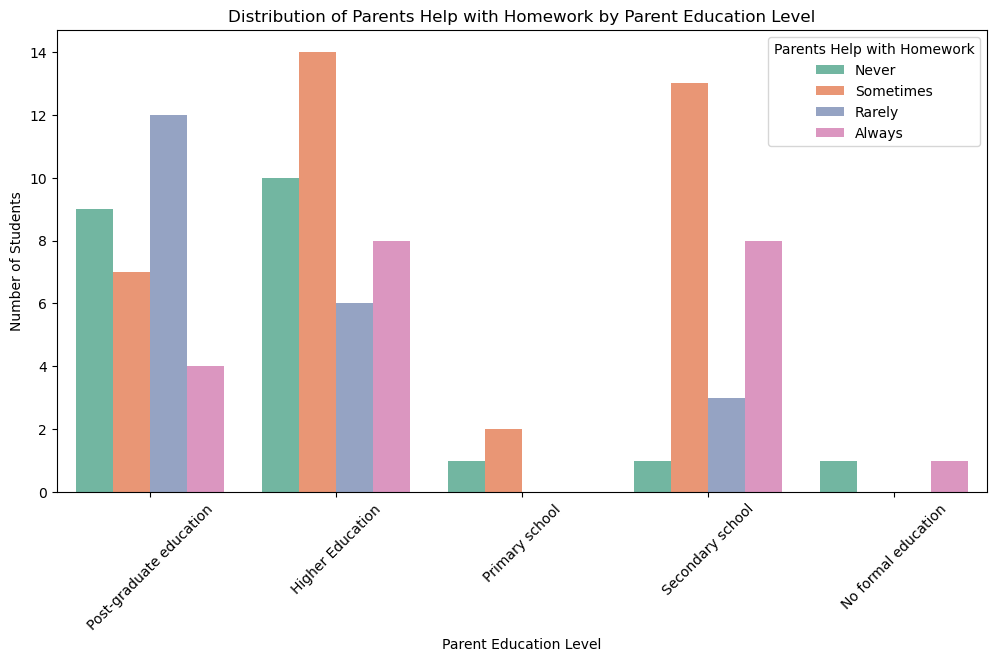

In [43]:
# Plotting the count of Parents Help with Homework by Parent Education Level
plt.figure(figsize=(12, 6))
sns.countplot(data=data_frame, x='Parent Education Level', hue='Parents Help with Homework', palette='Set2')
plt.title('Distribution of Parents Help with Homework by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Parents Help with Homework')
image_path = '../../../docs/homeworkparentedu.png'  
plt.savefig(image_path)
plt.show()

### Contingency Table of Parents' Help with Homework by Parent Education Level

| Parent Education Level       | Always | Never | Rarely | Sometimes |
|------------------------------|--------|-------|--------|-----------|
| Higher Education              |   8    |  10   |   6    |    14     |
| No Formal Education           |   1    |   1   |   0    |     0     |
| Post-Graduate Education       |   4    |   9   |  12    |     7     |
| Primary School                |   0    |   1   |   0    |     2     |
| Secondary School              |   8    |   1   |   3    |    13     |

### Insights

1. **Higher Education**:
   - Parents with higher education show a varied level of involvement, with the most significant support categorized as "Sometimes" (14 students). This indicates that while they often help, it may not be consistent.

2. **Post-Graduate Education**:
   - This group has a notable number of "Rarely" (12 students) helping with homework, suggesting that even with higher education, involvement can vary significantly. However, they still maintain a reasonable presence in "Always" (4 students) and "Sometimes" (7 students).

3. **Secondary School**:
   - Parents here are quite involved, with 8 students receiving help "Always" and 13 "Sometimes." This indicates a strong commitment to their children's academic support.

4. **No Formal Education**:
   - In contrast, parents with no formal education show minimal engagement, with only 1 student receiving help "Always" and none in other categories. This highlights a significant gap in homework support.

5. **Primary School**:
   - Parents with primary education show very low involvement, with only 2 students receiving help "Sometimes" and 1 "Never." This suggests a need for strategies to enhance parental involvement in this group.

### Conclusion
The analysis indicates a clear trend: higher parental education levels correlate with greater involvement in homework assistance. However, even among educated parents, the frequency of help can vary. Efforts for parents, especially those with no formal education, may enhance student academic outcomes.